# Leads Case Study

### Step 1: Importing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# Importing all datasets
data = pd.read_csv("Leads.csv")

### Step 2:Inspecting the Dataframe (and filling the Null Values)

In [5]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
data['Lead Number'].value_counts().sum()

9240

In [7]:
data['Prospect ID'].value_counts().sum()

9240

We can drop one from Lead Number or Prospect ID as both identifies the customer

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
data.isnull().sum()/len(data)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

#### Converting 'Select' Value to Null values

In [10]:
data = data.replace("Select", np.nan)

In [11]:
data.isnull().sum()/len(data)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

#### Columns which can be removed due to high null values
- 'how did you hear about X Education' can be removed, as it is covered by other variables
- 'Lead Quality' may be removed as it is based on intuition and at the same time more than 50% is missing
- 'Lead Profile' as missing values are high
- 'City' can be removed as most of them are either Null or Mumbai/Mumbai Outskrirts
- "Asymmetrique Variables" may be removed as the missing value % are too high

In [12]:
data.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

#### The null values in 'Specialzation' may be categorized as 'Other_Specialization', as the data is distributed along many categories and amount of null values is a bit high so should not be removed.

In [13]:
data['Specialization'].fillna(value ='Other_Specialization',inplace=True)

In [14]:
data.Specialization.value_counts()

Other_Specialization                 3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [15]:
data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

What is your current occupation can be dropped as apart from 'Null' most of the values are Unemployed

In [16]:
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

'What matters most to you in choosing the course' as most have the same answers and null values are high

In [17]:
data.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

##### Converting Null in 'Tags' to 'Not_Tagged'

In [18]:
data['Tags'].fillna(value ='Not_Tagged',inplace=True)

In [19]:
data['Tags'].value_counts()

Not_Tagged                                           3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

Values with low frequencies can be grouped together(will be done with other identified variables)

In [20]:
data['Tags'].value_counts()

Not_Tagged                                           3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [21]:
data['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
28.0        2
29.0        2
26.0        2
115.0       1
41.0        1
55.0        1
251.0       1
141.0       1
32.0        1
42.0        1
74.0        1
43.0        1
30.0        1
54.0        1
Name: TotalVisits, dtype: int64

#### Adding the least visit value to the Null Value

In [22]:
data['TotalVisits'].fillna(value = 1,inplace=True)

In [23]:
data['Page Views Per Visit'].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
1.80       13
6.50       13
2.75       12
1.40       11
2.80        9
4.33        9
2.20        9
14.00       9
3.25        8
2.17        8
1.60        8
2.40        6
13.00       6
12.00       5
1.20        5
2.60        4
1.83        4
15.00       4
1.71        4
3.40        4
1.43        4
1.57        3
5.67        3
16.00       3
4.75        3
1.38        3
1.78        3
4.25        3
1.23        2
2.09        2
2.22        2
1.22        2
3.60        2
5.33        2
2.83        2
1.14        2
3.75        2
7.50        2
5.40        2
1.56        2
2.71        2
3.20        2
5.25        2
2.14        1
55.00       1
1.19  

#### Adding the least visit to the Null Value

In [24]:
data['Page Views Per Visit'].fillna(value = 1,inplace=True)

In [25]:
data.Country.value_counts()/len(data)*100

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
Nigeria                  0.043290
Canada                   0.043290
Kuwait                   0.043290
South Africa             0.043290
Germany                  0.043290
Sweden                   0.032468
Belgium                  0.021645
Asia/Pacific Region      0.021645
Ghana                    0.021645
Uganda                   0.021645
Netherlands              0.021645
China                    0.021645
Philippines              0.021645
Bangladesh               0.021645
Italy                    0.021645
Sri Lanka                0.010823
Denmark       

In [26]:
data['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [27]:
data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
blog                    1
welearnblog_Home        1
WeLearn                 1
NC_EDM                  1
testone                 1
youtubechannel          1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

Values with low freqencies can be clubbed together. Will be done after removal of Null values in dataset

In [28]:
data['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [29]:
data.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [30]:
data['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Email Received                     1
View in browser link Clicked       1
Resubscribed to emails             1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

Values with low freqencies can be clubbed together. Will be done after removal of Null values in dataset.

In [31]:
data.Newspaper.value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [32]:
data['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [33]:
data['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [34]:
data['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [35]:
data['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [36]:
data['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [37]:
data['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [38]:
data['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [39]:
data['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [40]:
data['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [41]:
data['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [42]:
data['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [43]:
data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

Values with low freqencies can be clubbed together. Will be done after treating the Null the values in the dataset.

In [44]:
data['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Email Received                     1
View in browser link Clicked       1
Resubscribed to emails             1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

Values with low freqencies can be clubbed together. Will be done after treatment of Null values in the dataset.

### Understanding developed from the Data Set  on removing, replacing, binary and converting to dummy variables 

##### Columns which can be removed as the information is covered in other columns
- Prospect ID can be removed as Lead Number is there
- 'Last Activity'can be removed as it is covered under Last Notable Activity

#### Columns which can be removed as the most of the values are same
- Country, Newspaper Article, Newspaper, Search, Magazine, X Education Forums, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content,'Get updates on DM Content', 'I agree to pay the amount through cheque' as alsmost all values are identicle

##### Columns to be converted to binary 
- Do Not Email
- Do Not Call
- A free copy of Mastering The Interview

##### Columns to be converted to dummary variables
- Lead Origin
- Lead Source
- Last Notable Activity
- Specialization
- Tags

##### Scaling of the Numerical Variables
- TotalVisits
- Total Time Spent on Website
- Page Views Per Visit

### Step 3: Data Preparation

#### Removing Repeated and High Null Columns

In [45]:
data.drop(['Prospect ID','Last Activity','Country','City','What is your current occupation','What matters most to you in choosing a course','How did you hear about X Education','Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Newspaper Article', 'Newspaper', 'Search', 'Magazine', 'X Education Forums', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content', 'I agree to pay the amount through cheque'],axis=1,inplace=True)

In [46]:
data.isnull().sum()/len(data)*100

Lead Number                               0.00000
Lead Origin                               0.00000
Lead Source                               0.38961
Do Not Email                              0.00000
Do Not Call                               0.00000
Converted                                 0.00000
TotalVisits                               0.00000
Total Time Spent on Website               0.00000
Page Views Per Visit                      0.00000
Specialization                            0.00000
Tags                                      0.00000
A free copy of Mastering The Interview    0.00000
Last Notable Activity                     0.00000
dtype: float64

In [47]:
data.dropna(inplace=True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9204 non-null   int64  
 1   Lead Origin                             9204 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Do Not Email                            9204 non-null   object 
 4   Do Not Call                             9204 non-null   object 
 5   Converted                               9204 non-null   int64  
 6   TotalVisits                             9204 non-null   float64
 7   Total Time Spent on Website             9204 non-null   int64  
 8   Page Views Per Visit                    9204 non-null   float64
 9   Specialization                          9204 non-null   object 
 10  Tags                                    9204 non-null   obje

#### % of Rows remaining

In [49]:
round(data['Lead Number'].value_counts().sum()/9240*100,2)

99.61

#### Grouping low frequencies together in idenitfied Variables
- Tags
- Lead Source
- Last Notable Activity

In [50]:
data = data.replace(data[data['Tags'].map(data['Tags'].value_counts() < 12)]['Tags'].unique().tolist(),'Other_Tag')
data = data.replace(data[data['Lead Source'].map(data['Lead Source'].value_counts() < 31)]['Lead Source'].unique().tolist(),'Other_Source')
data = data.replace(data[data['Last Notable Activity'].map(data['Last Notable Activity'].value_counts() < 14)]['Last Notable Activity'].unique().tolist(),'Other_Activity')

In [51]:
data['Tags'].value_counts()

Not_Tagged                             3342
Will revert after reading the email    2052
Ringing                                1200
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            174
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
invalid number                           83
Diploma holder (Not Eligible)            63
wrong number given                       47
Other_Tag                                37
opp hangup                               33
number not provided                      26
in touch with EINS                       12
Name: Tags, dtype: int64

In [52]:
data['Lead Source'].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Other_Source          28
Name: Lead Source, dtype: int64

In [53]:
data['Last Notable Activity'].value_counts()

Modified                    3397
Email Opened                2823
SMS Sent                    2152
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  45
Unreachable                   32
Had a Phone Conversation      14
Other_Activity                 7
Name: Last Notable Activity, dtype: int64

#### Converting Binary Variables Yes/No to 1/0

In [54]:
status_1 = pd.get_dummies(data['Do Not Email'], drop_first=True)
status_1.rename(columns = {'Yes':'Do Not Email_Y'}, inplace = True)
status_2 = pd.get_dummies(data['Do Not Call'], drop_first=True)
status_2.rename(columns = {'Yes':'Do Not Call_Y'}, inplace = True)
status_3 = pd.get_dummies(data['A free copy of Mastering The Interview'], drop_first=True)
status_3.rename(columns = {'Yes':'A free copy of Mastering The Interview_Y'}, inplace = True)
data = pd.concat([data,status_1,status_2,status_3], axis=1)
data.drop(['Do Not Email','Do Not Call','A free copy of Mastering The Interview'], axis=1,inplace=True)

In [55]:
data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Tags,Last Notable Activity,Do Not Email_Y,Do Not Call_Y,A free copy of Mastering The Interview_Y
0,660737,API,Olark Chat,0,0.0,0,0.0,Other_Specialization,Interested in other courses,Modified,0,0,0
1,660728,API,Organic Search,0,5.0,674,2.5,Other_Specialization,Ringing,Email Opened,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Will revert after reading the email,Email Opened,0,0,1
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Ringing,Modified,0,0,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Other_Specialization,Will revert after reading the email,Modified,0,0,0


#### For categorical vairables with multiple levels converting to Dummy variables

In [56]:
status_1 = pd.get_dummies(data['Lead Origin'], drop_first=True)
status_2 = pd.get_dummies(data['Lead Source'], drop_first=True)
status_3 = pd.get_dummies(data['Last Notable Activity'], drop_first=True)
status_4 = pd.get_dummies(data['Specialization'], drop_first=True)
status_5 = pd.get_dummies(data['Tags'], drop_first=True)
data = pd.concat([data,status_1,status_2,status_3,status_4,status_5], axis=1)
data.drop(['Lead Origin','Lead Source','Last Notable Activity','Specialization','Tags'], axis=1,inplace=True)

In [57]:
data.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_Y,Do Not Call_Y,A free copy of Mastering The Interview_Y,Landing Page Submission,Lead Add Form,Lead Import,Facebook,Google,Olark Chat,Organic Search,Other_Source,Reference,Referral Sites,Welingak Website,Email Link Clicked,Email Opened,Had a Phone Conversation,Modified,Olark Chat Conversation,Other_Activity,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Other_Specialization,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Busy,Closed by Horizzon,Diploma holder (Not Eligible),Graduation in progress,Interested in full time MBA,Interested in other courses,Lost to EINS,Not doing further education,Not_Tagged,Other_Tag,Ringing,Will revert after reading the email,in touch with EINS,invalid number,number not provided,opp hangup,switched off,wrong number given
0,660737,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


#### Checking for outliers in the continuous numerical variables

In [58]:
num_data = data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [59]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9204.000000,9204.000000,9204.000000
mean,3.421339,489.005541,2.350799
std,4.833061,547.980340,2.151638
min,0.000000,0.000000,0.000000
25%,1.000000,14.000000,1.000000
50%,3.000000,250.000000,2.000000
75%,5.000000,938.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1839.970000,9.000000


##### TotalVisits seems to have outlier

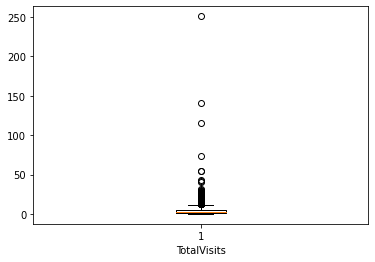

In [60]:
plt.boxplot(x='TotalVisits', data = data)
plt.xlabel('TotalVisits')
plt.show()

In [61]:
data.loc[data['TotalVisits'] > 17, 'TotalVisits'] = 17

Replacing values above 99 percentile with 99 percentile value

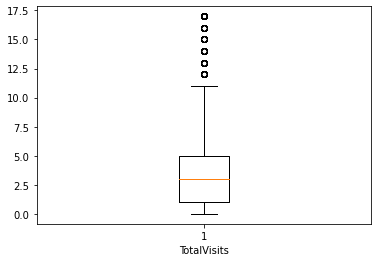

In [62]:
plt.boxplot(x='TotalVisits', data = data)
plt.xlabel('TotalVisits')
plt.show()

#### Page Views Per Visit seems to have outlier

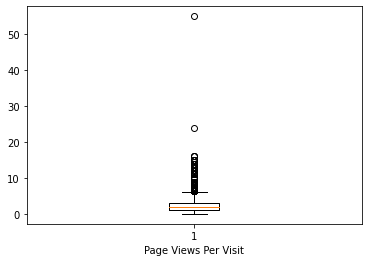

In [63]:

plt.boxplot(x='Page Views Per Visit', data = data)
plt.xlabel('Page Views Per Visit')
plt.show()

In [64]:
data.loc[data['Page Views Per Visit'] > 9, 'Page Views Per Visit'] = 9

Replacing values above 99 percentile with 99 percentile value

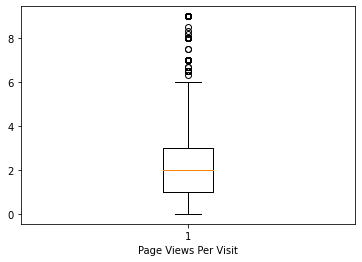

In [65]:
plt.boxplot(x='Page Views Per Visit', data = data)
plt.xlabel('Page Views Per Visit')
plt.show()

The remaining values about 99% in both the cases are many and close to the 99% value. Therefore, as it looks material, they are not removed. 

#### Checking the Number of independent Variables after data preperation

In [66]:
data.shape

(9204, 65)

### Step 4: Looking at correlations to identify any highly correlated variables

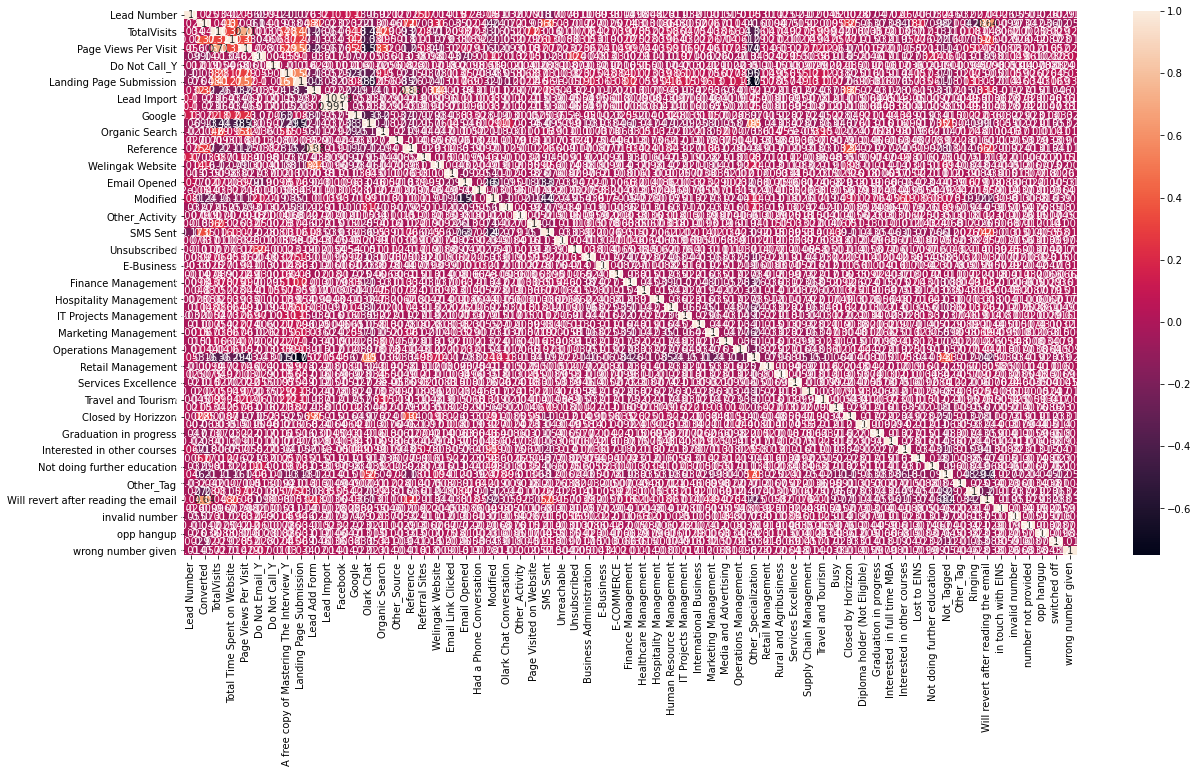

In [67]:
plt.figure(figsize = (20,10)) # Size of the figure
sns.heatmap(data.corr(),annot = True)
plt.show()

As it difficult to identify the highly correlated variables using the heatmap. We are moving to the modelling process.

### Step 5: Train-Test split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
# Putting feature variable to X
X = data.drop(['Converted','Lead Number'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_Y,Do Not Call_Y,A free copy of Mastering The Interview_Y,Landing Page Submission,Lead Add Form,Lead Import,Facebook,Google,Olark Chat,Organic Search,Other_Source,Reference,Referral Sites,Welingak Website,Email Link Clicked,Email Opened,Had a Phone Conversation,Modified,Olark Chat Conversation,Other_Activity,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Other_Specialization,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Busy,Closed by Horizzon,Diploma holder (Not Eligible),Graduation in progress,Interested in full time MBA,Interested in other courses,Lost to EINS,Not doing further education,Not_Tagged,Other_Tag,Ringing,Will revert after reading the email,in touch with EINS,invalid number,number not provided,opp hangup,switched off,wrong number given
0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1.0,305,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [70]:
# Putting response variable to y
y = data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [71]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 6: Feature Scaling

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_Y,Do Not Call_Y,A free copy of Mastering The Interview_Y,Landing Page Submission,Lead Add Form,Lead Import,Facebook,Google,Olark Chat,Organic Search,Other_Source,Reference,Referral Sites,Welingak Website,Email Link Clicked,Email Opened,Had a Phone Conversation,Modified,Olark Chat Conversation,Other_Activity,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Other_Specialization,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Busy,Closed by Horizzon,Diploma holder (Not Eligible),Graduation in progress,Interested in full time MBA,Interested in other courses,Lost to EINS,Not doing further education,Not_Tagged,Other_Tag,Ringing,Will revert after reading the email,in touch with EINS,invalid number,number not provided,opp hangup,switched off,wrong number given
5310,0.198076,-0.721902,0.833235,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2181,1.423238,-0.429014,2.843318,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8215,-1.027086,-0.905639,-1.176848,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8887,-0.414505,-0.487228,-0.171806,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7920,0.198076,-0.547261,0.833235,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [74]:
### Checking the Conversion Rate
Conversion = (sum(data['Converted'])/len(data['Converted'].index))*100
round(Conversion,2)

38.37

### Step 7: Model Building

In [75]:
import statsmodels.api as sm

In [76]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6378
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1204.7
Date:                Sun, 22 Jan 2023   Deviance:                       2409.3
Time:                        12:22:13   Pearson chi2:                 1.12e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.2950      1.033     -3.191      0.001      -5.319      -1.271
TotalVisits                                  0.2778      0.082      3.396      0.001       0.117       0.438
Total Time Spent on Website                  1.1736      0.066     17.714      0.000       1.044       1.303
Page Views Per Visit                        -0.1590      0.093     -1.718      0.086      -0.340       0.022
Do Not Email_Y                              -1.0232      0.294     -3.480      0.001      -1.600      -0.447
Do Not Call_Y                               19.6447   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
A free copy of Mastering The Interview_Y    -0.1230      0.183     -0.672      0.501      -0.481       0.235
Landing Page Submission                     -0.6661      0.231     -2.880      0.004      -1.119      -0.213
Lead Add Form                                0.1667      1.531      0.109      0.913      -2.833       3.166
Lead Import                                 25.7538   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Facebook                                   -25.6267   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Google                                       0.1274      0.190      0.671      0.502      -0.245       0.499
Olark Chat                                   1.1258      0.248      4.541      0.000       0.640       1.612
Organic Search                              -0.0077      0.216     -0.036      0.971      -0.430       0.415
Other_Source                                 0.6444      0.853      0.756      0.450      -1.027       2.316
Reference                                    0.6863      1.567      0.438      0.661      -2.384       3.757
Referral Sites                               0.0970      0.487      0.199      0.842      -0.857       1.051
Welingak Website                             6.5512      1.852      3.537      0.000       2.921      10.182
Email Link Clicked                          -1.3685      0.840     -1.629      0.103      -3.015       0.278
Email Opened                                -0.4760      0.744     -0.640      0.522      -1.933       0.981
Had a Phone Conversation                    21.9480   3.23e+04      0.001      0.999   -6.32e+04    6.33e+04
Modified                                    -1.8092      0.740     -2.446      0.014      -3.259      -0.359
Olark Chat Conversation                     -2.0008      0.833     -2.403      0.016      -3.633      -0.369
Other_Activity                               0.8570      3.771      0.227      0.820      -6.533       8.247
Page Visited on Website                     -1.0993      0.794     -1.385      0.166      -2.655       0.456
SMS Sent                       

### Step 8: Feature selection using RFE

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [78]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [79]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True])

In [80]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 33),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 34),
 ('Do Not Email_Y', False, 6),
 ('Do Not Call_Y', False, 46),
 ('A free copy of Mastering The Interview_Y', False, 31),
 ('Landing Page Submission', False, 13),
 ('Lead Add Form', False, 2),
 ('Lead Import', False, 30),
 ('Facebook', False, 22),
 ('Google', False, 39),
 ('Olark Chat', False, 3),
 ('Organic Search', False, 49),
 ('Other_Source', False, 23),
 ('Reference', False, 12),
 ('Referral Sites', False, 41),
 ('Welingak Website', True, 1),
 ('Email Link Clicked', False, 11),
 ('Email Opened', False, 43),
 ('Had a Phone Conversation', False, 8),
 ('Modified', True, 1),
 ('Olark Chat Conversation', False, 5),
 ('Other_Activity', False, 42),
 ('Page Visited on Website', False, 17),
 ('SMS Sent', True, 1),
 ('Unreachable', False, 29),
 ('Unsubscribed', False, 36),
 ('Business Administration', False, 40),
 ('E-Business', False, 28),
 ('E-COMMERCE', False, 20),
 ('Finance Mana

In [81]:
col = X_train.columns[rfe.support_]

In [82]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Do Not Email_Y', 'Do Not Call_Y',
       'A free copy of Mastering The Interview_Y', 'Landing Page Submission',
       'Lead Add Form', 'Lead Import', 'Facebook', 'Google', 'Olark Chat',
       'Organic Search', 'Other_Source', 'Reference', 'Referral Sites',
       'Email Link Clicked', 'Email Opened', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'Other_Activity', 'Page Visited on Website',
       'Unreachable', 'Unsubscribed', 'Business Administration', 'E-Business',
       'E-COMMERCE', 'Finance Management', 'Healthcare Management',
       'Hospitality Management', 'Human Resource Management',
       'IT Projects Management', 'International Business',
       'Marketing Management', 'Media and Advertising',
       'Operations Management', 'Other_Specialization', 'Retail Management',
       'Rural and Agribusiness', 'Services Excellence',
       'Supply Chain Management', 'Travel and T

In [83]:
#Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6426
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1455.1
Date:                Sun, 22 Jan 2023   Deviance:                       2910.2
Time:                        12:22:18   Pearson chi2:                 1.05e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.4478      0.226    -15.228      0.000      -3.892      -3.004
Welingak Website                        5.5516      1.019      5.449      0.000       3.555       7.548
Modified                               -1.1394      0.122     -9.338      0.000      -1.379      -0.900
SMS Sent                                2.3097      0.127     18.238      0.000       2.061       2.558
Busy                                    3.0726      0.309      9.946      0.000       2.467       3.678
Closed by Horizzon                      9.0364      0.747     12.096      0.000       7.572      10.501
Lost to EINS                            8.4690      0.750     11.287      0.000       6.998       9.940
Not_Tagged                              2.0900      0.229      9.127      0.000       1.641       2.539
Other_Tag                               2.9848      0.549      5.434      0.000       1.908       4.061
Ringing                                -1.3448      0.319     -4.213      0.000      -1.970      -0.719
Will revert after reading the email     6.6948      0.268     24.956      0.000       6.169       7.221
in touch with EINS                      2.9355      0.821      3.574      0.000       1.326       4.545
invalid number                         -1.7987      1.049     -1.714      0.087      -3.856       0.258
number not provided                   -22.1515   2.43e+04     -0.001      0.999   -4.76e+04    4.76e+04
switched off                           -1.7039      0.565     -3.014      0.003      -2.812      -0.596
wrong number given                    -22.4048   2.09e+04     -0.001      0.999    -4.1e+04     4.1e+04
=======================================================================================================
"""

In [84]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5310    0.077065
2181    0.030834
8215    0.076053
8887    0.721497
7920    0.204598
4947    0.996153
3073    0.962565
2722    0.996153
499     0.010078
8330    0.988447
dtype: float64

In [85]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0770647 , 0.03083408, 0.07605295, 0.72149725, 0.20459787,
       0.99615336, 0.96256517, 0.99615336, 0.01007832, 0.98844718])

In [86]:
# Creating the dataframe with the actual Converted flag
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,0,0.077065,5310
1,0,0.030834,2181
2,0,0.076053,8215
3,0,0.721497,8887
4,0,0.204598,7920


In [87]:
# Creating new column 'predicted' with 1 if Conversion_Prob. > .5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.077065,5310,0
1,0,0.030834,2181,0
2,0,0.076053,8215,0
3,0,0.721497,8887,1
4,0,0.204598,7920,0


In [88]:
from sklearn import metrics

In [89]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3744  156]
 [ 346 2196]]


In [90]:
# Predicted     not_conversion    conversion
# Actual
# not_conversion        3744      156
# conversion            346       2196  

In [91]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9220738900962434


In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Closed by Horizzon,1.08
3,Busy,1.05
0,Welingak Website,1.04
5,Lost to EINS,1.04
13,switched off,1.04
11,invalid number,1.01
14,wrong number given,1.01
7,Other_Tag,1.00
10,in touch with EINS,1.00
12,number not provided,1.00


#### The p value (and inter-percentile range) for variable 'number not provided' is quite high. Let's remove that and re-run the model.

In [94]:
col = col.drop('number not provided', 1)
col

Index(['Welingak Website', 'Modified', 'SMS Sent', 'Busy',
       'Closed by Horizzon', 'Lost to EINS', 'Not_Tagged', 'Other_Tag',
       'Ringing', 'Will revert after reading the email', 'in touch with EINS',
       'invalid number', 'switched off', 'wrong number given'],
      dtype='object')

In [95]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1457.3
Date:                Sun, 22 Jan 2023   Deviance:                       2914.6
Time:                        12:22:19   Pearson chi2:                 1.04e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.5410      0.227    -15.565      0.000      -3.987      -3.095
Welingak Website                        5.5478      1.019      5.446      0.000       3.551       7.544
Modified                               -1.1377      0.122     -9.319      0.000      -1.377      -0.898
SMS Sent                                2.2924      0.126     18.216      0.000       2.046       2.539
Busy                                    3.1713      0.309     10.273      0.000       2.566       3.776
Closed by Horizzon                      9.1282      0.747     12.212      0.000       7.663      10.593
Lost to EINS                            8.5607      0.751     11.402      0.000       7.089      10.032
Not_Tagged                              2.1870      0.229      9.533      0.000       1.737       2.637
Other_Tag                               3.0806      0.549      5.613      0.000       2.005       4.156
Ringing                                -1.2372      0.318     -3.891      0.000      -1.860      -0.614
Will revert after reading the email     6.7882      0.269     25.221      0.000       6.261       7.316
in touch with EINS                      3.0295      0.821      3.690      0.000       1.421       4.638
invalid number                         -1.6909      1.049     -1.612      0.107      -3.747       0.365
switched off                           -1.5954      0.564     -2.826      0.005      -2.702      -0.489
wrong number given                    -21.2977   1.27e+04     -0.002      0.999   -2.49e+04    2.49e+04
=======================================================================================================
"""

In [96]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [97]:
y_train_pred[:10]

array([0.07685721, 0.02816695, 0.07643909, 0.71876224, 0.20520692,
       0.99608715, 0.96257148, 0.99608715, 0.00920542, 0.9884506 ])

In [98]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [99]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.076857,5310,0
1,0,0.028167,2181,0
2,0,0.076439,8215,0
3,0,0.718762,8887,1
4,0,0.205207,7920,0


In [100]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9220738900962434


In [101]:
# Let's check the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Closed by Horizzon,1.08
3,Busy,1.05
0,Welingak Website,1.04
5,Lost to EINS,1.04
12,switched off,1.04
11,invalid number,1.01
13,wrong number given,1.01
7,Other_Tag,1.00
10,in touch with EINS,1.00
2,SMS Sent,0.26


#### The p value for varible 'wrong number given' is quite high. Let's remove that and re-run the model.

In [102]:
col = col.drop('wrong number given', 1)
col

Index(['Welingak Website', 'Modified', 'SMS Sent', 'Busy',
       'Closed by Horizzon', 'Lost to EINS', 'Not_Tagged', 'Other_Tag',
       'Ringing', 'Will revert after reading the email', 'in touch with EINS',
       'invalid number', 'switched off'],
      dtype='object')

In [103]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1460.6
Date:                Sun, 22 Jan 2023   Deviance:                       2921.2
Time:                        12:22:20   Pearson chi2:                 1.04e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.6827      0.229    -16.063      0.000      -4.132      -3.233
Welingak Website                        5.5424      1.019      5.441      0.000       3.546       7.539
Modified                               -1.1360      0.122     -9.297      0.000      -1.375      -0.897
SMS Sent                                2.2658      0.125     18.156      0.000       2.021       2.510
Busy                                    3.3216      0.308     10.772      0.000       2.717       3.926
Closed by Horizzon                      9.2685      0.748     12.390      0.000       7.802      10.735
Lost to EINS                            8.7008      0.751     11.579      0.000       7.228      10.174
Not_Tagged                              2.3346      0.230     10.148      0.000       1.884       2.786
Other_Tag                               3.2266      0.548      5.885      0.000       2.152       4.301
Ringing                                -1.0735      0.316     -3.397      0.001      -1.693      -0.454
Will revert after reading the email     6.9306      0.271     25.620      0.000       6.400       7.461
in touch with EINS                      3.1727      0.820      3.867      0.000       1.565       4.781
invalid number                         -1.5267      1.048     -1.456      0.145      -3.581       0.528
switched off                           -1.4301      0.563     -2.539      0.011      -2.534      -0.326
=======================================================================================================
"""

In [104]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [105]:
y_train_pred[:10]

array([0.07653509, 0.02453785, 0.07698353, 0.71457603, 0.20618569,
       0.99598519, 0.96259956, 0.99598519, 0.00801274, 0.98845396])

In [106]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [107]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.076535,5310,0
1,0,0.024538,2181,0
2,0,0.076984,8215,0
3,0,0.714576,8887,1
4,0,0.206186,7920,0


In [108]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9220738900962434


In [109]:
# Let's check the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Closed by Horizzon,1.08
3,Busy,1.05
0,Welingak Website,1.04
5,Lost to EINS,1.04
12,switched off,1.04
11,invalid number,1.01
7,Other_Tag,1.00
10,in touch with EINS,1.00
2,SMS Sent,0.26
9,Will revert after reading the email,0.19


#### The p value for varible 'invalid number' is quite high. Let's remove that and re-run the model.

In [110]:
col = col.drop('invalid number', 1)
col

Index(['Welingak Website', 'Modified', 'SMS Sent', 'Busy',
       'Closed by Horizzon', 'Lost to EINS', 'Not_Tagged', 'Other_Tag',
       'Ringing', 'Will revert after reading the email', 'in touch with EINS',
       'switched off'],
      dtype='object')

In [111]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6429
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1462.2
Date:                Sun, 22 Jan 2023   Deviance:                       2924.5
Time:                        12:22:21   Pearson chi2:                 1.04e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.8106      0.226    -16.841      0.000      -4.254      -3.367
Welingak Website                        5.5386      1.019      5.438      0.000       3.542       7.535
Modified                               -1.1340      0.122     -9.276      0.000      -1.374      -0.894
SMS Sent                                2.2480      0.124     18.119      0.000       2.005       2.491
Busy                                    3.4552      0.305     11.338      0.000       2.858       4.052
Closed by Horizzon                      9.3948      0.747     12.572      0.000       7.930      10.859
Lost to EINS                            8.8270      0.751     11.759      0.000       7.356      10.298
Not_Tagged                              2.4663      0.226     10.909      0.000       2.023       2.909
Other_Tag                               3.3572      0.546      6.149      0.000       2.287       4.427
Ringing                                -0.9309      0.311     -2.993      0.003      -1.540      -0.321
Will revert after reading the email     7.0587      0.268     26.345      0.000       6.534       7.584
in touch with EINS                      3.3013      0.819      4.031      0.000       1.696       4.906
switched off                           -1.2865      0.560     -2.296      0.022      -2.385      -0.188
=======================================================================================================
"""

In [112]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [113]:
y_train_pred[:10]

array([0.07631487, 0.02165604, 0.07739527, 0.71171542, 0.20681486,
       0.99591393, 0.9626053 , 0.99591393, 0.00707127, 0.98845777])

In [114]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [115]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.076315,5310,0
1,0,0.021656,2181,0
2,0,0.077395,8215,0
3,0,0.711715,8887,1
4,0,0.206815,7920,0


In [116]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9220738900962434


In [117]:
# Let's check the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Closed by Horizzon,1.08
0,Welingak Website,1.04
3,Busy,1.04
5,Lost to EINS,1.04
11,switched off,1.04
7,Other_Tag,1.00
10,in touch with EINS,1.00
2,SMS Sent,0.26
9,Will revert after reading the email,0.19
8,Ringing,0.05


As now p values are below .05 and VIFs are below 5. These variables may be selected for the model.

In [118]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3744,  156],
       [ 346, 2196]], dtype=int64)

In [119]:
# Actual/Predicted     not_conversion    conversion
        # not_conversion        3744      156
        # conversion            346       2196 

#### Metrics beyong accuracy

In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8638867033831629

In [122]:
# Let us calculate specificity
TN / float(TN+FP)

0.96

In [123]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.04


In [124]:
# positive predictive value 
print (TP / float(TP+FP))

0.9336734693877551


In [125]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9154034229828851


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [126]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [127]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

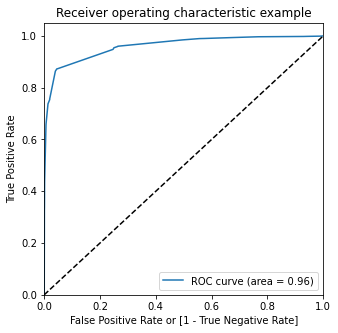

In [128]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Step 10: Finding optimal cut-off point

In [129]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.076315,5310,0,1,0,0,0,0,0,0,0,0,0
1,0,0.021656,2181,0,1,0,0,0,0,0,0,0,0,0
2,0,0.077395,8215,0,1,0,0,0,0,0,0,0,0,0
3,0,0.711715,8887,1,1,1,1,1,1,1,1,1,0,0
4,0,0.206815,7920,0,1,1,1,0,0,0,0,0,0,0


In [130]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.394598  1.000000  0.000000
0.1   0.1  0.824589  0.960268  0.736154
0.2   0.2  0.830177  0.948072  0.753333
0.3   0.3  0.920987  0.873328  0.952051
0.4   0.4  0.922384  0.872541  0.954872
0.5   0.5  0.922074  0.863887  0.960000
0.6   0.6  0.922074  0.863887  0.960000
0.7   0.7  0.922074  0.863887  0.960000
0.8   0.8  0.892114  0.756884  0.980256
0.9   0.9  0.861999  0.660504  0.993333


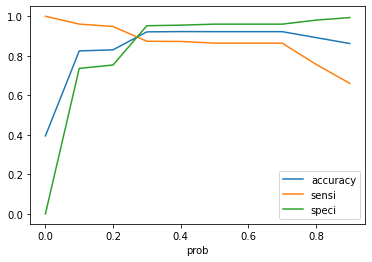

In [131]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curves above, 0.28 seems to be the optimum point to take it as a cutoff probability. Let's apply the same on the train dataset.

In [132]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.076315,5310,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.021656,2181,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.077395,8215,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.711715,8887,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.206815,7920,0,1,1,1,0,0,0,0,0,0,0,0


In [133]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9209872710338404

In [134]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3713,  187],
       [ 322, 2220]], dtype=int64)

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8733280881195908

In [137]:
# Let us calculate specificity
TN / float(TN+FP)

0.9520512820512821

In [138]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.047948717948717946


In [139]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9223099293726631


In [140]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9201982651796778


### Step 11: Making predictions on the test data set

In [141]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [142]:
X_test = X_test[col]
X_test.head()

,Welingak Website,Modified,SMS Sent,Busy,Closed by Horizzon,Lost to EINS,Not_Tagged,Other_Tag,Ringing,Will revert after reading the email,in touch with EINS,switched off
2400,0,0,1,0,0,0,0,0,0,1,0,0
849,0,1,0,0,0,0,1,0,0,0,0,0
7459,0,0,0,0,0,0,0,0,0,0,0,0
6184,0,1,0,0,0,0,0,1,0,0,0,0
4869,0,0,0,0,0,0,0,0,0,1,0,0


In [143]:
X_test_sm = sm.add_constant(X_test)

In [144]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [145]:
y_test_pred[:10]

2400    0.995914
849     0.077395
7459    0.021656
6184    0.169750
4869    0.962605
2519    0.995914
5419    0.008650
2103    0.962605
3987    0.077395
3512    0.007071
dtype: float64

In [146]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [147]:
# Let's see the head
y_pred_1.head()

,0
2400,0.995914
849,0.077395
7459,0.021656
6184,0.169750
4869,0.962605


In [148]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [149]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [150]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [151]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [152]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,2400,0.995914
1,0,849,0.077395
2,0,7459,0.021656
3,1,6184,0.169750
4,1,4869,0.962605


In [153]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [154]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Conversion_Prob'],axis=1)

In [155]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob
0,2400,1,0.995914
1,849,0,0.077395
2,7459,0,0.021656
3,6184,1,0.169750
4,4869,1,0.962605


In [156]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.28 else 0)

In [157]:
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob,final_predicted
0,2400,1,0.995914,1
1,849,0,0.077395,0
2,7459,0,0.021656,0
3,6184,1,0.169750,0
4,4869,1,0.962605,1


In [158]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9275887038377987

In [159]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1692,   80],
       [ 120,  870]], dtype=int64)

In [160]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [161]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8787878787878788

In [162]:
# Let us calculate specificity
TN / float(TN+FP)

0.9548532731376975

The model seems to be a very good fit, as it gives high accuracy (around 90%) along with high senstivity (around 90%) and also specificity (around 90%).